In [37]:
# BASIC & PANDAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# SKLEARN & MODELING
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Telecom_churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
df['p_number'] = df['area code'].astype(str) + df['phone number']

In [6]:
df['p_number'] = df['p_number'].str.replace('-','')

In [9]:
df['p_number'] = df['p_number'].astype(int)

In [10]:
df['international plan']= df['international plan'].str.replace('no',"0")
df['international plan']= df['international plan'].str.replace('yes',"1")
df['voice mail plan']= df['voice mail plan'].str.replace('no',"0")
df['voice mail plan']= df['voice mail plan'].str.replace('yes',"1")

In [11]:
df['international plan'] = df['international plan'].astype(int)
df['voice mail plan'] = df['voice mail plan'].astype(int)

In [12]:
df['target'] = df['churn'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
c

In [16]:
df_cleaned = df.drop(columns=['state','area code','phone number','churn'])

In [18]:
df_cleaned.to_csv('Churn_Dataset_Model_Ready.csv')

In [14]:
X = df.drop(columns=['state','area code','phone number','churn','target'])

In [15]:
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8)

In [22]:
imputer = SimpleImputer(strategy='median')
scaler = RobustScaler()
transformer = make_pipeline(imputer,scaler)

In [24]:
model = LogisticRegression()
pipe = make_pipeline(transformer,model)

In [25]:
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

In [29]:
confusion_matrix(y_test,test_preds)

array([[688,  21],
       [105,  20]])

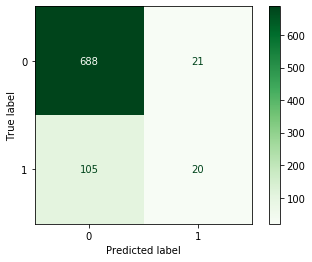

In [35]:
plot_confusion_matrix(pipe, X_test, y_test,
                     cmap=plt.cm.Greens,
                     values_format=".3g")
plt.grid(False)
plt.show()

In [45]:
print(f'TRAIN Accuracy: {accuracy_score(y_train, train_preds)}')
print(f'TEST Accuracy: {accuracy_score(y_test, test_preds)}')

print(f'TRAIN Balanced Accuracy: {balanced_accuracy_score(y_train, train_preds)}')
print(f'Test Balanced Accuracy: {balanced_accuracy_score(y_test, test_preds)}')

TRAIN Accuracy: 0.8659463785514205
TEST Accuracy: 0.8489208633093526
TRAIN Balanced Accuracy: 0.5914416330279538
Test Balanced Accuracy: 0.5651904090267983
